In [1]:
                                                                                                                                                                                                                                                                                                                                                           # Linear algebra
import numpy as np

# Data processing
import pandas as pd

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Train and Test split
from sklearn.model_selection import train_test_split

#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

In [2]:
df=pd.read_csv(r"D:\data science\Social_Network_Ads.csv")

In [3]:
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1]) 

Number of rows is =  400  
Number of columns is =  5


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df.head().style.background_gradient(cmap='coolwarm')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

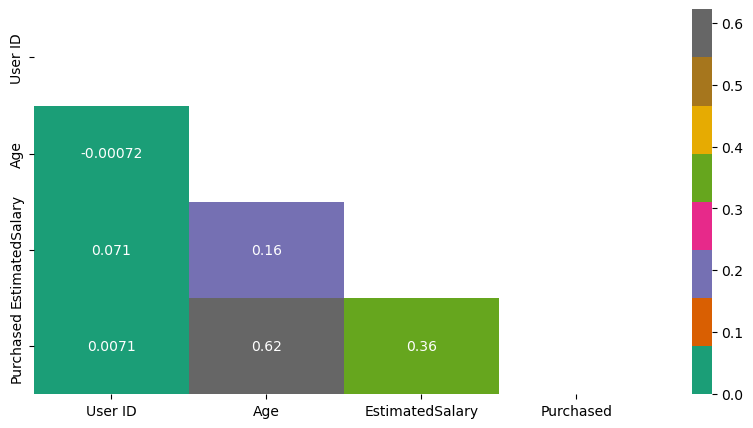

In [9]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [10]:
correlation = pd.DataFrame(df.corr().Purchased)
correlation

,Purchased
User ID,0.007120
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


In [11]:
df.drop('User ID', axis = 1, inplace=True)

In [12]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

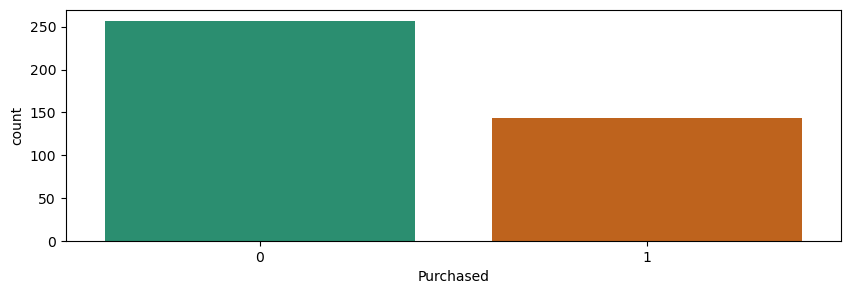

In [13]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Purchased",data=df, palette="Dark2")
plt.show()

<Figure size 1000x300 with 0 Axes>

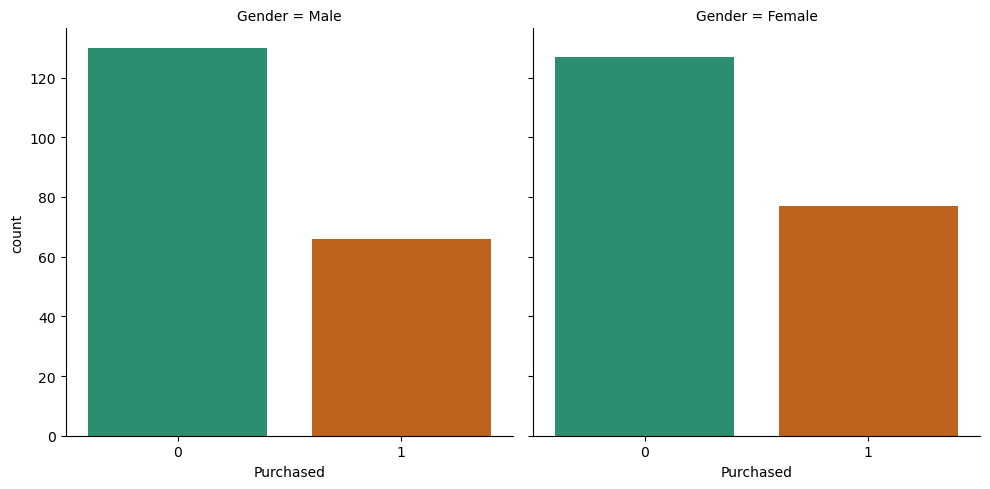

In [14]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette="Dark2");
plt.show()

In [15]:
pd.crosstab(df.Gender,df.Purchased,normalize = "index" ).style.background_gradient(cmap='crest')

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


<AxesSubplot:xlabel='Age', ylabel='Count'>

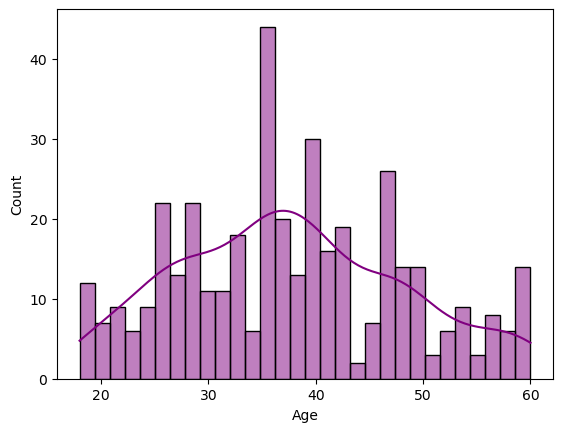

In [16]:
sns.histplot(df['Age'],kde=True,color='purple',bins=30)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

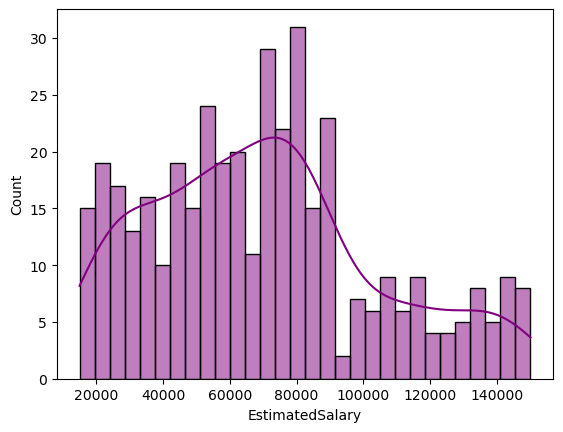

In [17]:
sns.histplot(df['EstimatedSalary'],kde=True,color='purple',bins=30)

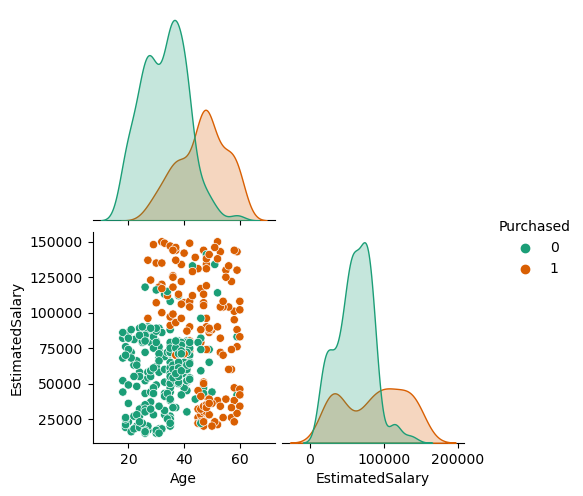

In [18]:
sns.pairplot(df , hue = 'Purchased',palette='Dark2',corner=True )

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

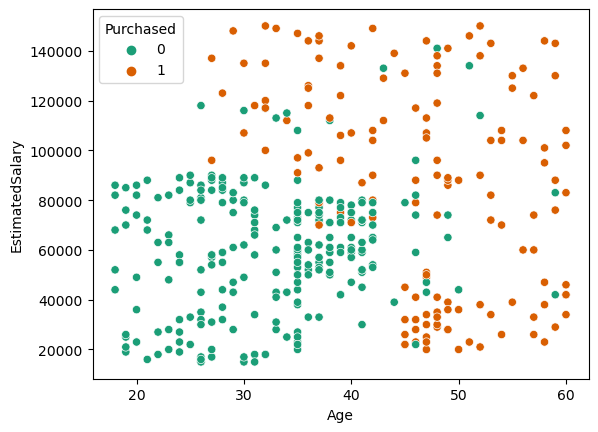

In [19]:
sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased', palette ='Dark2')

In [20]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True)

In [21]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [22]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
cols = X_train.columns

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [26]:
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifierKNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [28]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[64  4]
 [ 3 29]]


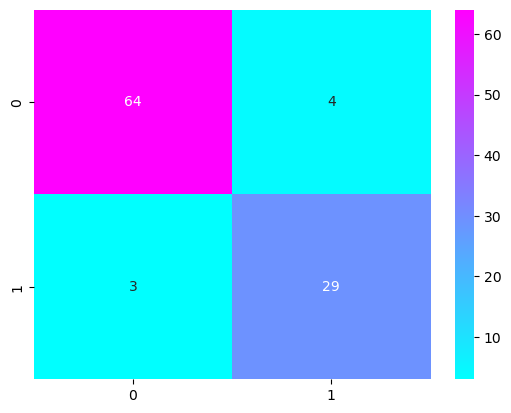

In [29]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='cool')
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [31]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

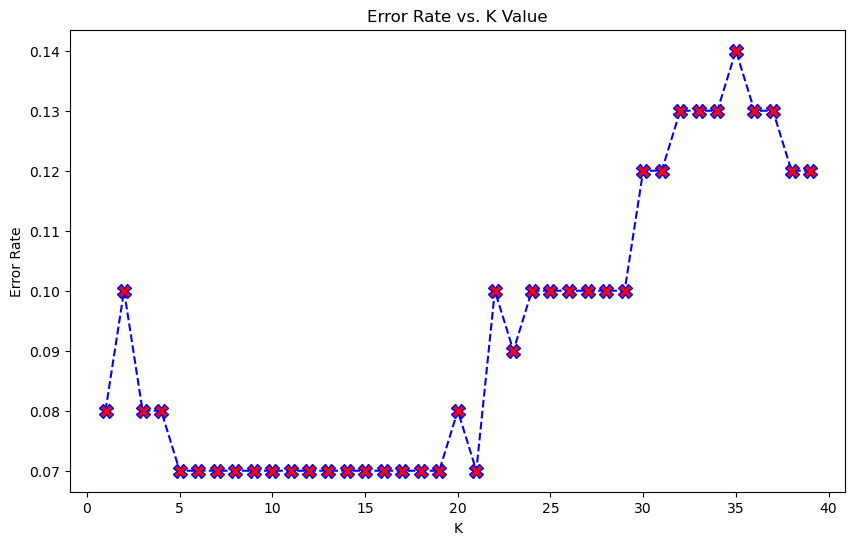

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=10


[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100





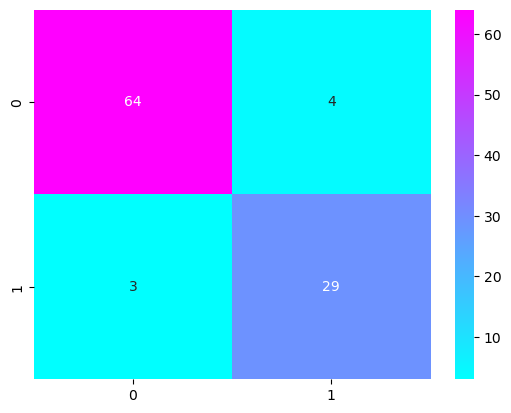

In [33]:
knn1 = KNeighborsClassifier(n_neighbors=10)

knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred1))
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred1))
print('\n')

WITH K=35


[[65  3]
 [11 21]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.88      0.66      0.75        32

    accuracy                           0.86       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.86      0.86      0.85       100





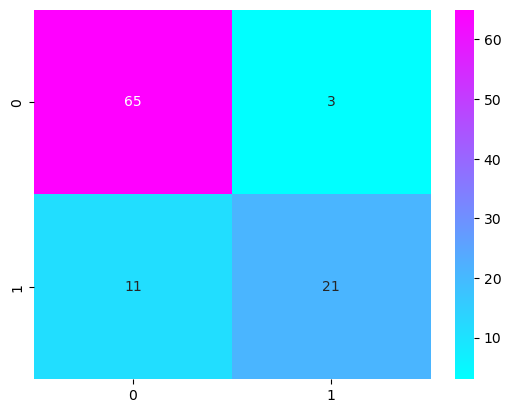

In [34]:
knn2 = KNeighborsClassifier(n_neighbors=35)

knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred2))
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred2))
print('\n')

In [35]:
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
classifierLin.gamma

'scale'

In [37]:
classifierLin.C

1.0

In [39]:
y_pred_svc = classifierLin.predict(X_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
cm2 = confusion_matrix(y_test, y_pred_svc)
print(cm2)

[[66  2]
 [ 9 23]]


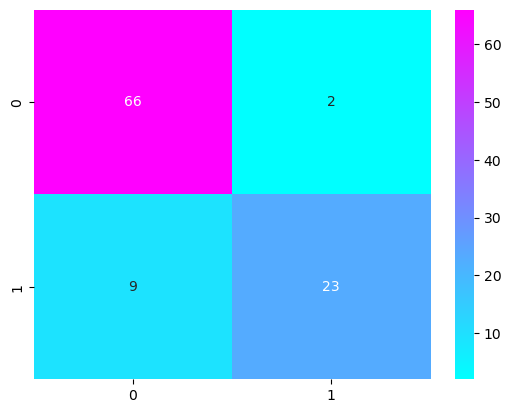

In [41]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='cool')
plt.show()

In [42]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



In [43]:
classifierrbf = SVC(kernel = 'rbf')
classifierrbf.fit(X_train, y_train)

SVC()

In [44]:
y_pred_rbf = classifierrbf.predict(X_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [45]:
cm3 = confusion_matrix(y_test, y_pred_rbf)
print(cm3)

[[64  4]
 [ 3 29]]


In [46]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [47]:
g =GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})

In [48]:
g.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})